In [0]:
# Loading Library 
import pandas as pd
import seaborn as sns

In [0]:
data = pd.read_csv("https://raw.githubusercontent.com/equester/TataTelecomAI/master/Sample%20Data/asr_data_tt.csv")

In [89]:
data.columns

Index(['Incoming Attempts', 'Normal Term Seizures', 'Answered Calls',
       'Normal Not Answer Calls', 'Outgoing Seizures', 'FEV Seizures',
       'Network Conversation Minutes', 'NER', 'ACD'],
      dtype='object')

In [90]:
data.head(10)

,Incoming Attempts,Normal Term Seizures,Answered Calls,Normal Not Answer Calls,Outgoing Seizures,FEV Seizures,Network Conversation Minutes,NER,ACD
0,171,51,19,32,52,1,30.833333,100.000000,1.622807
1,1,44,31,13,44,0,0.033333,100.000000,0.001075
2,456601,440591,97563,343028,453573,3648,584245.166700,97.925432,5.988389
3,41,41,40,1,41,0,14.533333,100.000000,0.363333
4,239,49,11,38,71,14,36.666667,85.964912,3.333333
5,8019,459,188,271,643,103,1435.066667,85.000000,7.633333
6,10,8,8,0,8,0,13.133333,100.000000,1.641667
7,995717,810191,219605,590586,826539,14677,305785.550000,99.794177,1.392434
8,697441,495671,132245,363426,599515,18633,424442.050000,85.330756,3.209513
9,1826,8250,5360,2890,8373,65,102.300000,99.301878,0.019086


In [91]:
data.shape

(1678, 9)

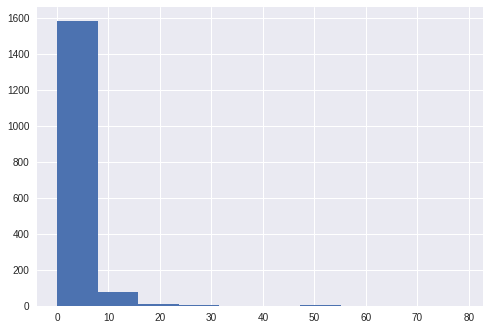

In [20]:
data['ACD'].hist()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


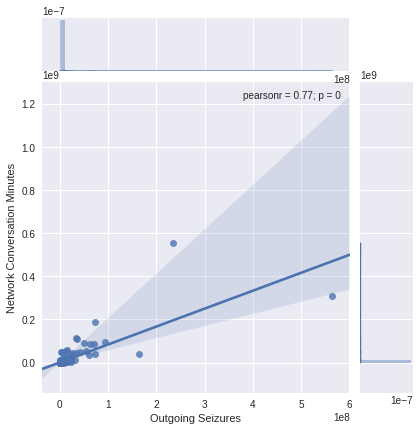

In [93]:
sns.jointplot("Outgoing Seizures", "Network Conversation Minutes", data=data, kind='reg')

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
data1 = scaler.transform(data)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [96]:
data = pd.DataFrame(data1)
data.head()

,0,1,2,3,4,5,6,7,8
0,-0.097274,-0.104956,-0.110750,-0.096416,-0.089276,-0.104202,-0.094213,0.538661,-0.260589
1,-0.097284,-0.104957,-0.110748,-0.096419,-0.089276,-0.104203,-0.094214,0.538661,-0.626521
2,-0.069447,-0.063757,-0.089269,-0.043025,-0.061540,-0.100785,-0.061043,0.375909,0.724474
3,-0.097282,-0.104957,-0.110746,-0.096421,-0.089276,-0.104203,-0.094214,0.538661,-0.544780
4,-0.097270,-0.104956,-0.110752,-0.096415,-0.089274,-0.104190,-0.094212,-0.562401,0.125380


In [0]:
data.columns = ['Incoming Attempts',	'Normal Term Seizures'	,'Answered Calls','Normal Not Answer Calls',	'Outgoing Seizures',	'FEV Seizures',	'Network Conversation Minutes',	'NER',	'ACD']

In [107]:
data.head()

,Incoming Attempts,Normal Term Seizures,Answered Calls,Normal Not Answer Calls,Outgoing Seizures,FEV Seizures,Network Conversation Minutes,NER,ACD
0,-0.097274,-0.104956,-0.110750,-0.096416,-0.089276,-0.104202,-0.094213,0.538661,-0.260589
1,-0.097284,-0.104957,-0.110748,-0.096419,-0.089276,-0.104203,-0.094214,0.538661,-0.626521
2,-0.069447,-0.063757,-0.089269,-0.043025,-0.061540,-0.100785,-0.061043,0.375909,0.724474
3,-0.097282,-0.104957,-0.110746,-0.096421,-0.089276,-0.104203,-0.094214,0.538661,-0.544780
4,-0.097270,-0.104956,-0.110752,-0.096415,-0.089274,-0.104190,-0.094212,-0.562401,0.125380


In [0]:
feature_cols = ['Incoming Attempts',	'Normal Term Seizures'	,'Answered Calls','Normal Not Answer Calls',	'Outgoing Seizures',	'FEV Seizures',	'Network Conversation Minutes',	'NER']                # create a Python list of feature names
X = data[feature_cols]     

In [100]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(1678, 8)


In [101]:
y = data.ACD    # data['ACD']
y.head()

0   -0.260589
1   -0.626521
2    0.724474
3   -0.544780
4    0.125380
Name: ACD, dtype: float64

In [0]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

In [105]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (1342, 8)
y_train shape:  (1342,)

Test cases as below
X_test shape:  (336, 8)
y_test shape:  (336,)


In [0]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import metrics
from sklearn import linear_model

#model 1

linreg = LinearRegression()
linreg.fit(X_train, y_train) 
y_pred_test = linreg.predict(X_test)

#Accuracy 
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))


In [109]:
RMSE_test

1.2896313602761296

In [68]:
print('Intercept:',linreg.intercept_)                                           # print the intercept 
print('Coefficients:',linreg.coef_)

Intercept: 6.085222622400291
Coefficients: [-1.30047731e-07 -4.49591253e-08 -1.28872310e-08 -3.20718598e-08
  1.21359236e-07  1.11754918e-07  7.28087878e-08 -3.66992793e-02]


In [0]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()
coef.insert(0, linreg.intercept_)

In [70]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 6.085222622400291
Incoming Attempts -1.3004773149233706e-07
Normal Term Seizures -4.4959125319873684e-08
Answered Calls -1.2887230961922496e-08
Normal Not Answer Calls -3.2071859795357885e-08
Outgoing Seizures 1.2135923643759983e-07
FEV Seizures 1.1175491756433211e-07
Network Conversation Minutes 7.280878779950776e-08
NER -0.03669927934627527


In [81]:
y_pred_test = linreg.predict(X_test)
y_test

df = pd.DataFrame(y_pred_test,y_test)
df.columns = ['Actual']
df.head()

,Actual
ACD,
2.958984,2.415223
3.575000,2.415295
2.494444,3.520203
2.938059,2.904057
2.803664,2.530389


In [110]:
X[:1]

,Incoming Attempts,Normal Term Seizures,Answered Calls,Normal Not Answer Calls,Outgoing Seizures,FEV Seizures,Network Conversation Minutes,NER
0,-0.097274,-0.104956,-0.11075,-0.096416,-0.089276,-0.104202,-0.094213,0.538661


In [0]:
testdata = pd.read_csv("testdata.csv")

In [111]:
linreg.predict(X[:1])

array([-0.08177313])